In [11]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [12]:
# Step 1: Data Preprocessing

# Load the dataset
data = pd.read_excel('customer_churn_large_dataset.xlsx')

In [13]:
# Initial data exploration
print(data.head())
print(data.info())

# Handle missing data (if any)
data.dropna(inplace=True)


   CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   
2         3.0  Customer_3  24.0  Female  Los Angeles   
3         4.0  Customer_4  36.0  Female        Miami   
4         5.0  Customer_5  46.0  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                        17.0         73.36           236.0    0.0  
1                         1.0         48.76           172.0    0.0  
2                         5.0         85.47           460.0    0.0  
3                         3.0         97.94           297.0    1.0  
4                        19.0         58.14           266.0    0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID         

In [14]:
# dropping customerid and name as they are irrelevent to the dataset
data.drop(['CustomerID', 'Name'], axis=1, inplace = True)

In [15]:
# Encode categorical variables: Gender and Location using one hot encoding
label_encoders = {}
categorical_columns = ['Gender', 'Location']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [16]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,1,2,17.0,73.36,236.0,0.0
1,62.0,0,4,1.0,48.76,172.0,0.0
2,24.0,0,2,5.0,85.47,460.0,0.0
3,36.0,0,3,3.0,97.94,297.0,1.0
4,46.0,0,3,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...
99995,33.0,1,1,23.0,55.13,226.0,1.0
99996,62.0,0,4,19.0,61.65,351.0,0.0
99997,64.0,1,0,17.0,96.11,251.0,1.0
99998,51.0,0,4,20.0,49.25,434.0,1.0


In [17]:
# Split data into training and testing sets
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)

In [19]:
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model's performance using appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [21]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.50
Precision: 0.50
Recall: 0.47
F1-score: 0.48


In [22]:
def predict_churn(input_data):
    # Perform preprocessing and make predictions using the deployed model
    input_data = pd.DataFrame(input_data, index=[0])
    for col in categorical_columns:
        le = label_encoders[col]
        input_data[col] = le.transform(input_data[col])
    
    prediction = model.predict(input_data)
    return prediction.tolist()

In [23]:
# Example usage
new_customer_data = {
    'Age': 30,
    'Gender': 'Male',
    'Location': 'New York',
    'Subscription_Length_Months': 12,
    'Monthly_Bill': 100,
    'Total_Usage_GB': 50
}

predicted_churn = predict_churn(new_customer_data)
print(f"Predicted Churn: {predicted_churn[0]}")

Predicted Churn: 1.0


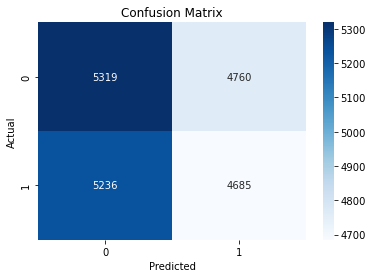

In [24]:
# Visualizing Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


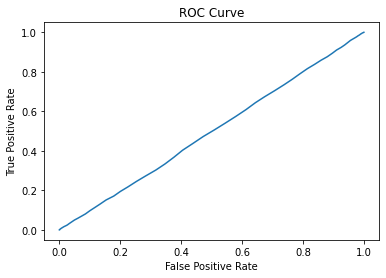

ROC AUC: 0.50


In [25]:
# Receiver Operating Characteristic (ROC) Curve:

from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

roc_auc = roc_auc_score(y_test, probs)
print(f'ROC AUC: {roc_auc:.2f}')


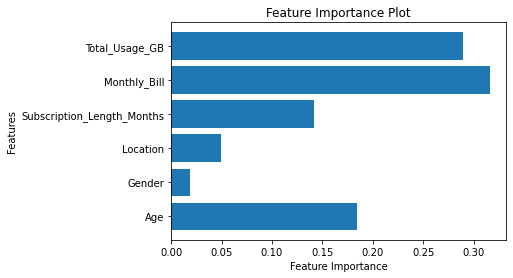

In [26]:
# Displaying importance of each features

feature_importance = model.feature_importances_
features = X_train.columns
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


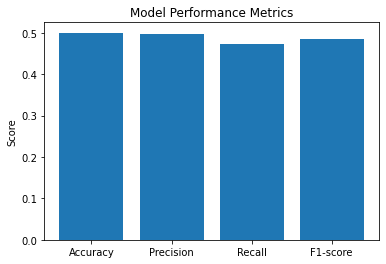

In [27]:
performance_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

plt.bar(performance_metrics.keys(), performance_metrics.values())
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()


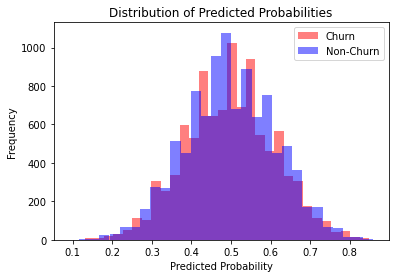

In [28]:
# Visualizing the distribution of predicted probabilities for each class (churn and non-churn) to understand how confident the model is in its predictions

churn_probs = model.predict_proba(X_test)[:, 1]
plt.hist(churn_probs[y_test == 1], label='Churn', alpha=0.5, color='red', bins=30)
plt.hist(churn_probs[y_test == 0], label='Non-Churn', alpha=0.5, color='blue', bins=30)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()
